In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 


(1189, 1212)


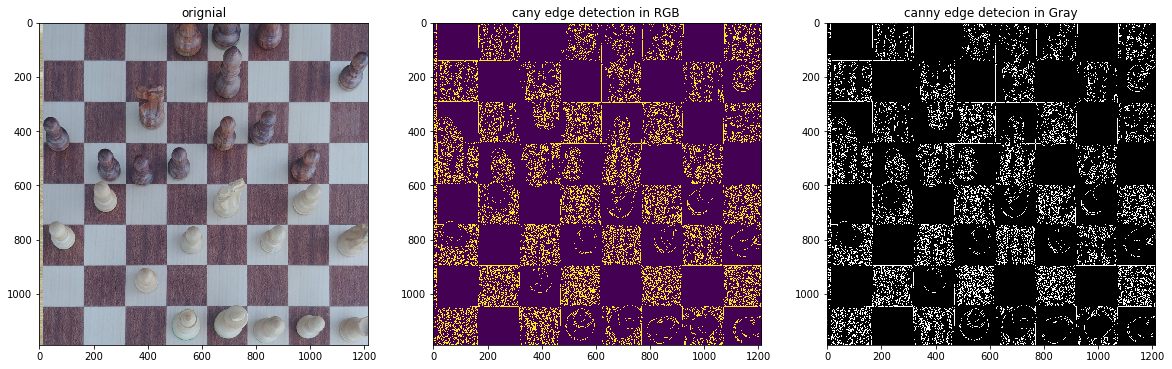

In [29]:
input_image = cv2.imread('input1.jpg')
input_image = cv2.cvtColor(input_image , cv2.COLOR_BGR2RGB)


edge_canny = cv2.Canny(input_image,50,100)

gray = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
edge_canny_gray=cv2.Canny(gray,50,120)

f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))

ax1.set_title('orignial')
ax1.imshow(input_image)

ax2.set_title('cany edge detection in RGB ')
ax2.imshow(edge_canny)

ax3.set_title('canny edge detecion in Gray')
ax3.imshow(edge_canny_gray,cmap='gray')
# print(edge_canny_gray.shape)

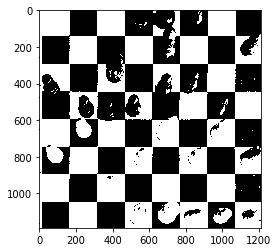

In [12]:
# import cv2
  
# originalImage = cv2.imread('C:/Users/N/Desktop/Test.jpg')
grayImage = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
  
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 130, 255, cv2.THRESH_BINARY)
 
# cv2.imshow('Black white image', blackAndWhiteImage)
# cv2.imshow('Original image',originalImage)
# cv2.imshow('Gray image', grayImage)

plt.imshow(blackAndWhiteImage , cmap = 'gray')

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [10]:

from PIL import Image

def crop(path, input, height, width, k, page, area):
    im = Image.open(input)
    imgwidth, imgheight = im.size
    for i in range(0,imgheight,height):
        for j in range(0,imgwidth,width):
            box = (j, i, j+width, i+height)
            a = im.crop(box)
            try:
                o = a.crop(area)
                o.save(os.path.join(path,"PNG","%s" % page,"IMG-%s.png" % k))
            except:
                pass
            k +=1

In [13]:
grayImage.shape

(1189, 1212)

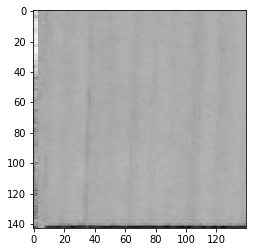

In [28]:
abdo =grayImage[0:143 , 10:150]

plt.imshow(abdo,cmap='gray')

bool

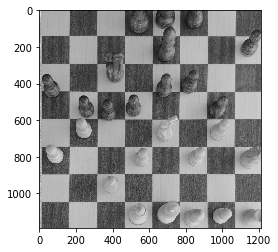

In [38]:
nline = 4
ncol = 4 

img = np.copy(input_image)

## termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

## processing
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray ,cmap = 'gray')

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nline, ncol), None)
# corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
# plt.imshow(corners)
type(ret)

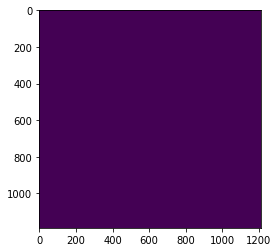

In [57]:
import cv2 as cv
# img = cv2.imread("noisy_square_img.png",0)
# blur = cv2.GaussianBlur(input_image,(5,5),0)
# threshold = cv2.THRESH_BINARY+cv2.THRESH_OTSU
_, img_binary = cv2.threshold(gray,0,255,cv2.THRESH_BINARY)
plt.imshow(img_binary)

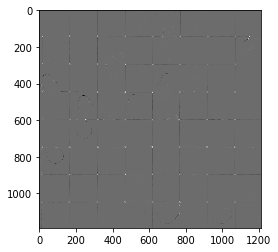

In [13]:
img_copy = np.copy(input_image)
# Convert to grayscale
gray = cv2.cvtColor(img_copy,cv2.COLOR_RGB2GRAY)

# Convert to float type 
gray = np.float32(gray)

# Detect corner by harris
dst = cv2.cornerHarris(gray , 4 , 9 , 0.04)  # 2 square , 3 kernal size , 0.04 the color background

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)
plt.imshow(dst,cmap='gray')

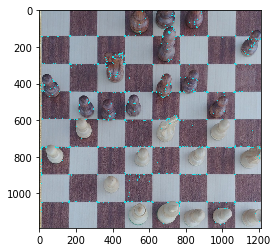

In [14]:
# Define trehold to extract strong corners 
# This value may be depending on the image 

thresh = 0.01 * dst.max()

# Create corner image to drow corner 
corner_img = np.copy(input_image)

# Iterate through all the corners and drow the in the image ( if they pass from threshold)
for j in range(0,dst.shape[0]):
    for i in range(0,dst.shape[1]):
        if( dst[j,i] > thresh ):
            # image ,center pt , radius , color , thickness
            cv2.circle(corner_img,(i,j),0,(25,222,229),0)

plt.imshow(corner_img)     
# corner_img.shape
# cv2.imwrite('E://output.jpg',corner_img,cv2.COLOR_)

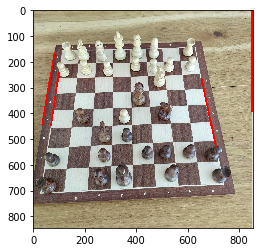

In [33]:
# Define the Hough transform parameter 

rho = 1
theta = np.pi/250
threshold = 50
min_line_length = 200
max_line_gap = 4

lines = cv2.HoughLinesP(edges,rho,theta,threshold,np.array([]),min_line_length,max_line_gap)

line_image = np.copy(input_image)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

plt.imshow(line_image)        

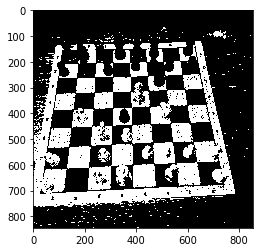

In [2]:
hand_copy = cv2.imread('output.jpg')

# Convert to grayscale 
gray= cv2.cvtColor(hand_copy,cv2.COLOR_RGB2GRAY)

# Create binary threshold 
retval , binray = cv2.threshold(gray , 125,250,cv2.THRESH_BINARY_INV)

plt.imshow(binray,cmap='gray')

In [29]:
# Find contours from threshold image 
reteval , contours , hirearchy = cv2.findContours(gray , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE)

# Draw contours 
hand_copy2 = np.copy(hand_copy)
all_contours = cv2.drawContours(hand_copy,contours,1,(0,250,0),1)

# plt.imshow(all_contours)

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\contours.cpp:199: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


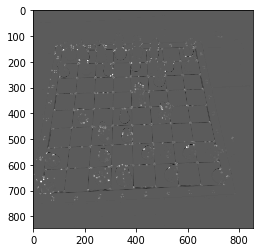

In [8]:
img_copy = np.copy(hand_copy)
# Convert to grayscale
gray = cv2.cvtColor(img_copy,cv2.COLOR_RGB2GRAY)

# Convert to float type 
gray = np.float32(gray)

# Detect corner by harris
dst = cv2.cornerHarris(gray , 4 , 9 , 0.04)  # 2 square , 3 kernal size , 0.04 the color background

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)
plt.imshow(dst,cmap='gray')

True

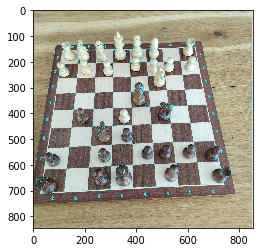

In [25]:
# Define trehold to extract strong corners 
# This value may be depending on the image 

thresh = 0.01 * dst.max()

# Create corner image to drow corner 
corner_img = np.copy(hand_copy)

# Iterate through all the corners and drow the in the image ( if they pass from threshold)
for j in range(0,1):
    for i in range(0,10):
        if( dst[j,i] > thresh ):
            # image ,center pt , radius , color , thickness
            cv2.circle(corner_img,(i,j),0,(25,222,229),0)

plt.imshow(corner_img)     
# corner_img.shape
# cv2.imwrite('E://output.jpg',corner_img,cv2.COLOR_)
cv2.imwrite('corner.jpg',corner_img)

In [28]:
# read image
img = cv2.imread('output.jpg')
# convert img to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# read template as grayscale
tmplt = cv2.imread('corner.jpg', cv2.IMREAD_GRAYSCALE)
hh, ww = tmplt.shape

# define corner intersection in template
offset_x = 50
offset_y = 70

# do template matching
corrimg = cv2.matchTemplate(img_gray,tmplt,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(corrimg)
max_val_ncc = '{:.3f}'.format(max_val)
print("normalize_cross_correlation: " + max_val_ncc)
xx = max_loc[0]
yy = max_loc[1]
corner_x = xx + offset_x
corner_y = yy + offset_y
print('xmatchloc =',xx,'ymatch =',yy)
print('cornerlocx =',corner_x,'cornerlocy =',corner_y)

# draw template bounds and corner intersection in red onto img
result = img.copy()
cv2.rectangle(result, (xx, yy), (xx+ww, yy+hh), (0, 0, 255), 2)
cv2.circle(result, (corner_x,corner_y), 1, (0, 0, 255), 2)

cv2.imshow('image', img)
cv2.imshow('template', tmplt)
cv2.imshow('result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# save results
cv2.imwrite('drawing_template_match_location.jpg', result)

normalize_cross_correlation: 1.000
xmatchloc = 0 ymatch = 0
cornerlocx = 50 cornerlocy = 70


True

In [14]:
print(type(dst))
dst[0]

<class 'numpy.ndarray'>


array([-5.35676560e+07, -3.81866000e+07, -2.48994000e+07, -1.28321740e+07,
       -3.02353800e+06,  2.09779500e+06,  3.49278300e+06,  3.89669850e+06,
        6.67782100e+06,  1.66384130e+07,  2.99413480e+07,  3.28185660e+07,
        3.28185660e+07,  3.28185660e+07,  2.40134840e+07,  1.35148640e+07,
        1.05998030e+07,  1.56786350e+07,  2.80921680e+07,  3.47927520e+07,
        3.47927520e+07,  3.47927520e+07, -3.01760000e+05, -1.08592800e+07,
        9.82716000e+06,  3.88945280e+07,  3.88945280e+07,  3.88945280e+07,
        6.96247520e+07,  9.28233200e+07,  9.28233200e+07,  9.28233200e+07,
        6.02099040e+07,  4.28065200e+07,  4.12615520e+07,  3.89860880e+07,
        3.31936880e+07,  4.89666320e+07,  4.89666320e+07,  4.89666320e+07,
        2.84851940e+07,  1.79612780e+07,  1.79612780e+07,  1.79612780e+07,
        1.30417640e+07, -4.28324800e+06, -9.95028900e+06,  1.71492700e+06,
        3.48214250e+06,  4.26358200e+06,  5.09510300e+06,  5.09510300e+06,
        5.09510300e+06, -